In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style='darkgrid')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('mall_customers.csv')
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Univariate Analysis

In [3]:
df1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


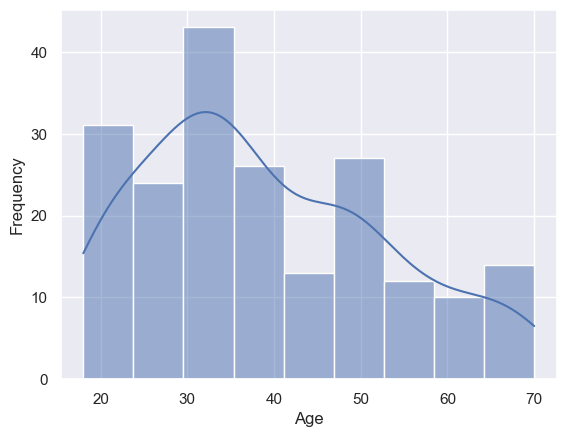

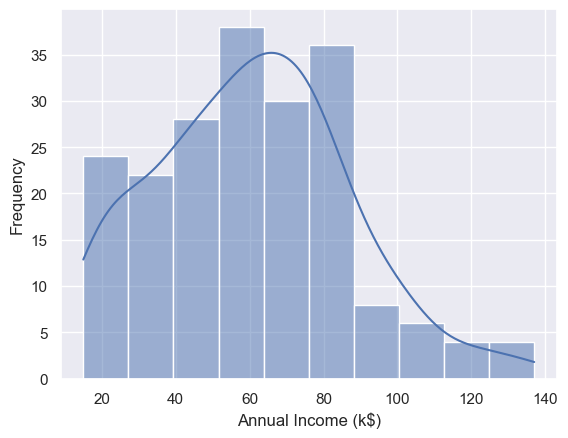

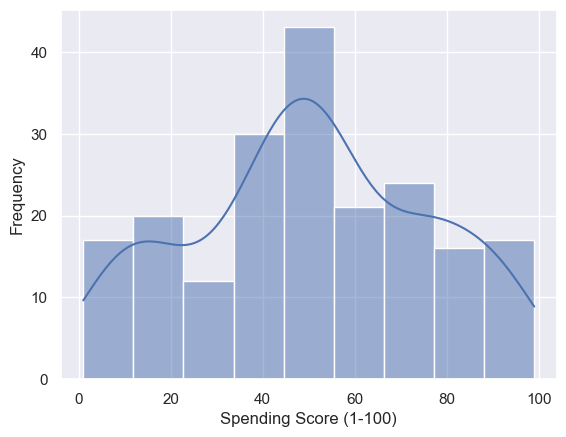

In [4]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col1 in columns:
    plt.figure()
    sns.histplot(df1[col1], kde=True)
    plt.xlabel(f'{col1}')
    plt.ylabel('Frequency')

plt.show()

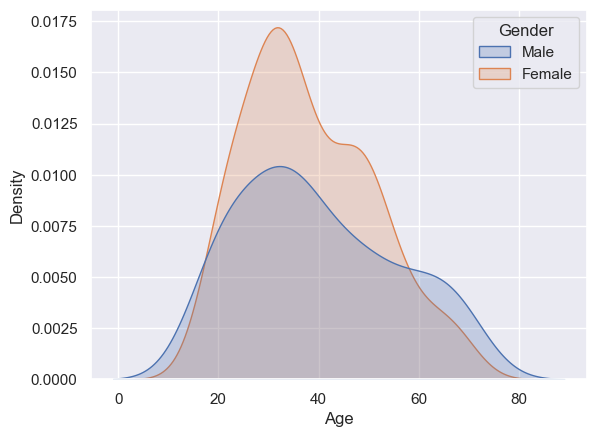

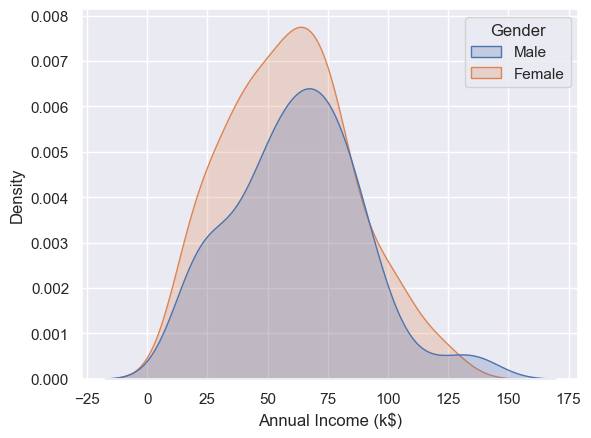

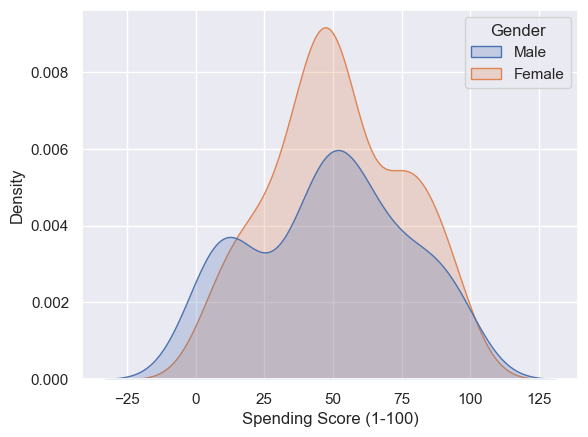

In [8]:
for col2 in columns:
    melted_df = df1.melt(id_vars='Gender', value_vars=[col2]) # reshaping df1 
    plt.figure()
    sns.kdeplot(data=melted_df, x='value', hue='Gender', shade=True)
    plt.xlabel(f'{col2}')
    plt.ylabel('Density')

plt.show()

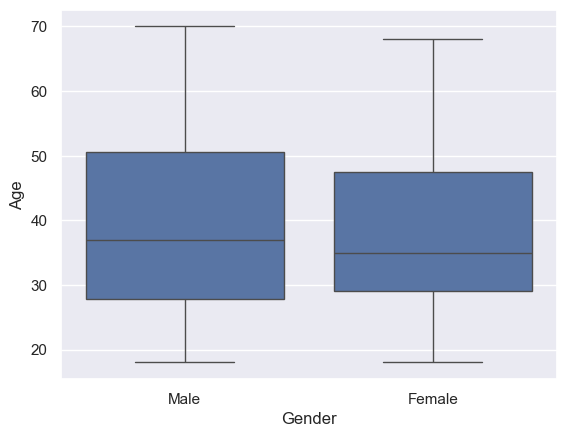

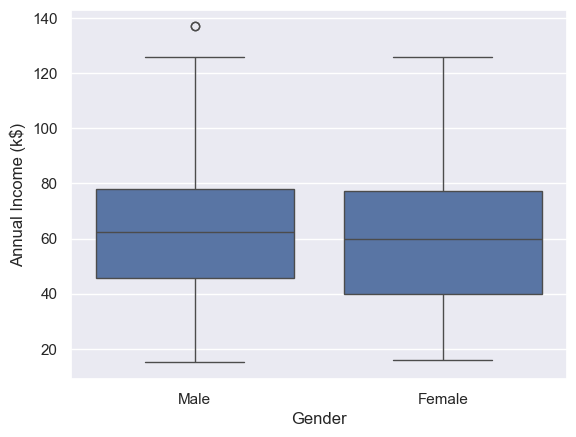

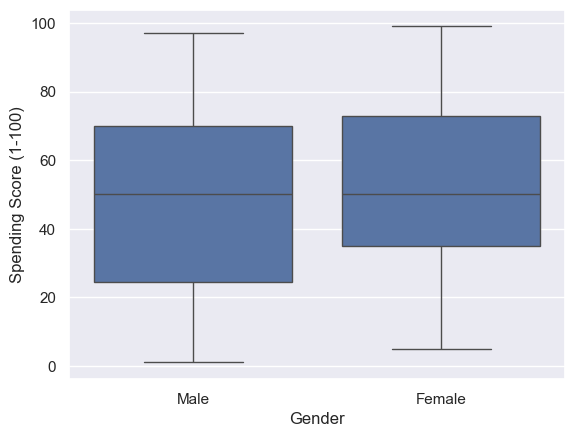

In [9]:
for col3 in columns:
    #melted_df = df1.melt(id_vars='Gender', value_vars=[col2]) # reshaping df1 
    plt.figure()
    sns.boxplot(data=df1, x='Gender', y=df1[col3])

plt.show()

In [11]:
df1['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#### Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

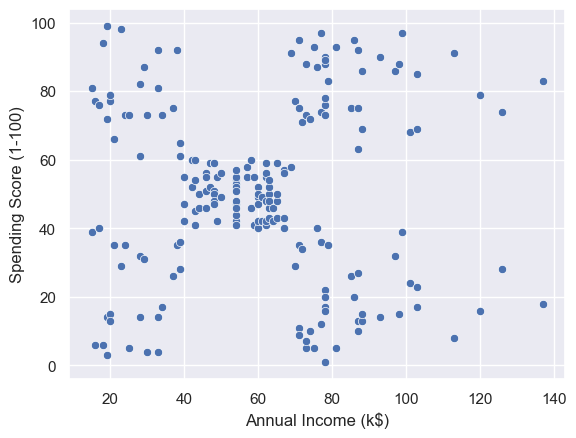

In [12]:
sns.scatterplot(data=df1, x=df1['Annual Income (k$)'], y=df1['Spending Score (1-100)'])

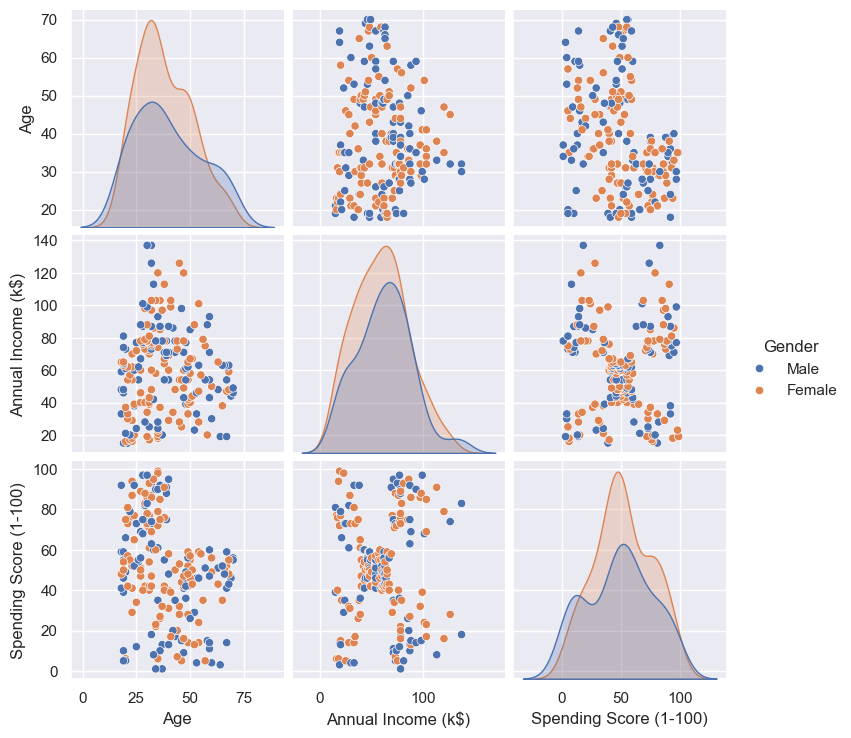

In [18]:
#df1 = df1.drop('CustomerID', axis=1)
sns.pairplot(df1, hue='Gender')

In [21]:
df1.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


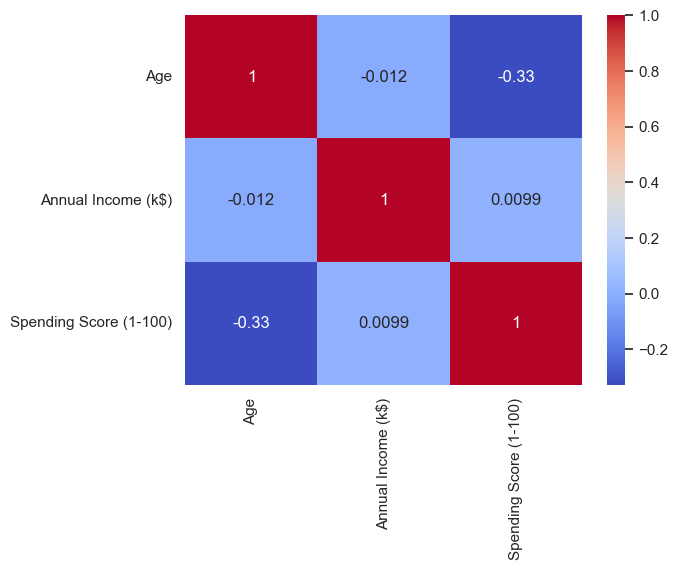

In [25]:
# df1.corr(numeric_only=True)

df1_corr = df1.corr(numeric_only=True)

# plt.figure(figsize=(8, 6))
sns.heatmap(df1_corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap of')
plt.show()

#### Clustering Analysis

##### Univariate CLustering

In [101]:
clustering1 = KMeans(n_clusters=3, random_state=42)

clustering1.fit(df1[['Annual Income (k$)']])

df1['Income Cluster'] = clustering1.labels_

df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,1
2,Female,20,16,6,2,4
3,Female,23,16,77,2,1
4,Female,31,17,40,2,4


In [41]:
df1['Income Cluster'].value_counts()

Income Cluster
0    92
1    72
2    36
Name: count, dtype: int64

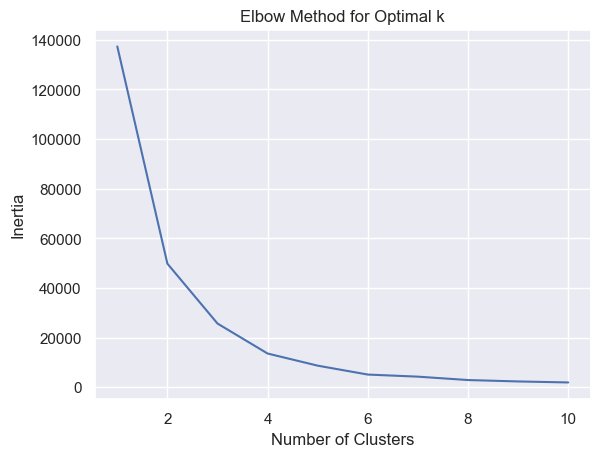

In [120]:
inertia_scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df1[['Annual Income (k$)']])
    inertia = kmeans.inertia_
    inertia_scores.append(inertia)

plt.plot(range(1, 11), inertia_scores)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
df1.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [117]:
df1.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


##### Bivariate Clustering

In [103]:
clustering2 = KMeans(n_clusters=5, random_state=42)

clustering2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])

df1['Income and Spending Score Cluster'] = clustering2.labels_

df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score Cluster
0,Male,19,15,39,2,4
1,Male,21,15,81,2,2
2,Female,20,16,6,2,4
3,Female,23,16,77,2,2
4,Female,31,17,40,2,4


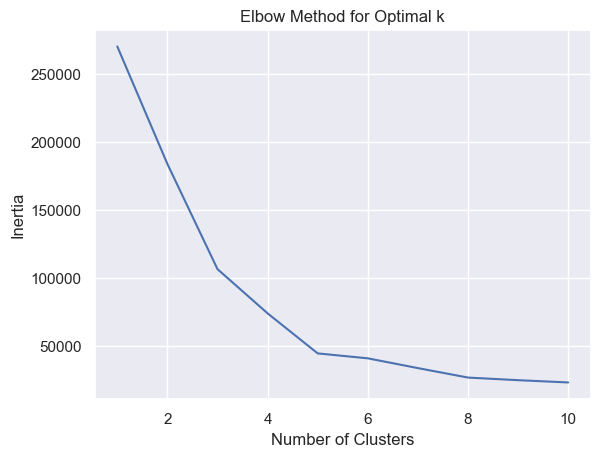

In [119]:
inertia_scores2 = []

for j in range(1, 11):
    kmeans2 = KMeans(n_clusters=j, random_state=42)
    kmeans2.fit(df1[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1, 11), inertia_scores2)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [64]:
centroids = pd.DataFrame(clustering2.cluster_centers_)
centroids.columns = ['x', 'y']
centroids

,x,y
0,55.296296,49.518519
1,25.727273,79.363636
2,88.200000,17.114286
3,86.538462,82.128205
4,26.304348,20.913043


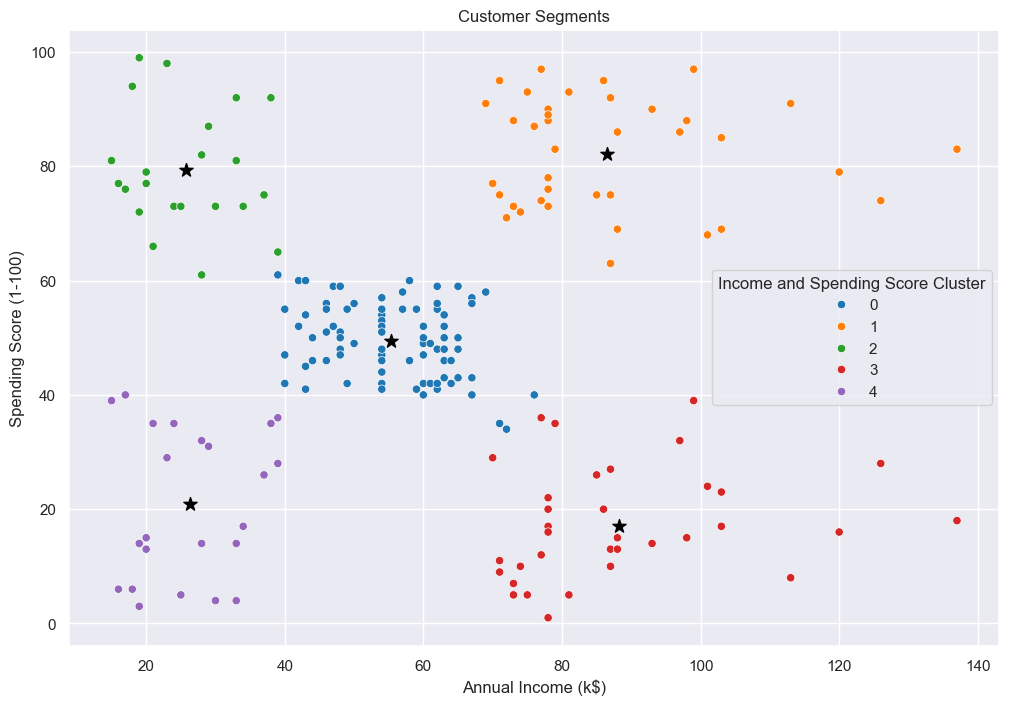

In [131]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income and Spending Score Cluster', palette='tab10')
plt.scatter(x=centroids['x'], y=centroids['y'], s=100, c='black', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [72]:
pd.crosstab(df1['Income and Spending Score Cluster'], df1['Gender'], normalize='index')

Gender,Female,Male
Income and Spending Score Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.457143,0.542857
3,0.538462,0.461538
4,0.608696,0.391304


In [73]:
df1.groupby('Income and Spending Score Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income and Spending Score Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,41.114286,88.200000,17.114286
3,32.692308,86.538462,82.128205
4,45.217391,26.304348,20.913043


##### Multivariate Clustering

In [82]:
scaler = StandardScaler()

In [75]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score Cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,1
2,Female,20,16,6,0,4
3,Female,23,16,77,0,1
4,Female,31,17,40,0,4


In [90]:
df2 = pd.get_dummies(df1, drop_first=True)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income and Spending Score Cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,1,True
2,20,16,6,0,4,False
3,23,16,77,0,1,False
4,31,17,40,0,4,False


In [91]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income and Spending Score Cluster', 'Gender_Male'],
      dtype='object')

In [92]:
df2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [93]:
df2 = pd.DataFrame(scaler.fit_transform(df2))
df2.columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


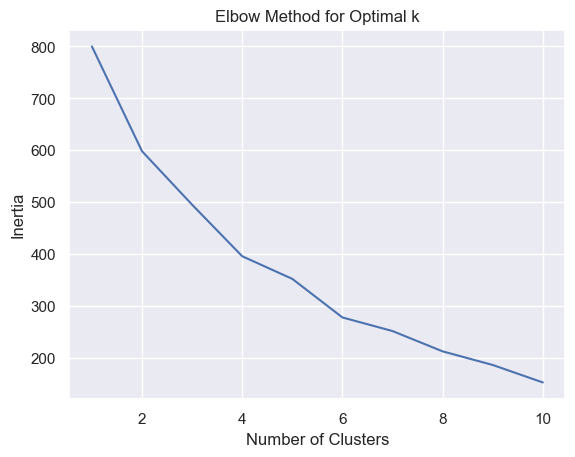

In [118]:
inertia_scores3 = []

for k in range(1, 11):
    kmeans3 = KMeans(n_clusters=k, random_state=42)
    kmeans3.fit(df2)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1, 11), inertia_scores3)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [146]:
clustering3 = KMeans(n_clusters=5, random_state=42)

clustering3.fit(df2[['Annual Income (k$)', 'Spending Score (1-100)']])

df2['Multivariate Cluster'] = clustering3.labels_

df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Multivariate Cluster
0,-1.424569,-1.738999,-0.434801,1.128152,4
1,-1.281035,-1.738999,1.195704,1.128152,2
2,-1.352802,-1.700830,-1.715913,-0.886405,4
3,-1.137502,-1.700830,1.040418,-0.886405,2
4,-0.563369,-1.662660,-0.395980,-0.886405,4


In [150]:
centroids2 = pd.DataFrame(clustering3.cluster_centers_)
centroids2.columns = ['x', 'y']
centroids2

,x,y
0,-0.200913,-0.026456
1,0.991583,1.239503
2,-1.329545,1.132178
3,1.055003,-1.284439
4,-1.307519,-1.136965


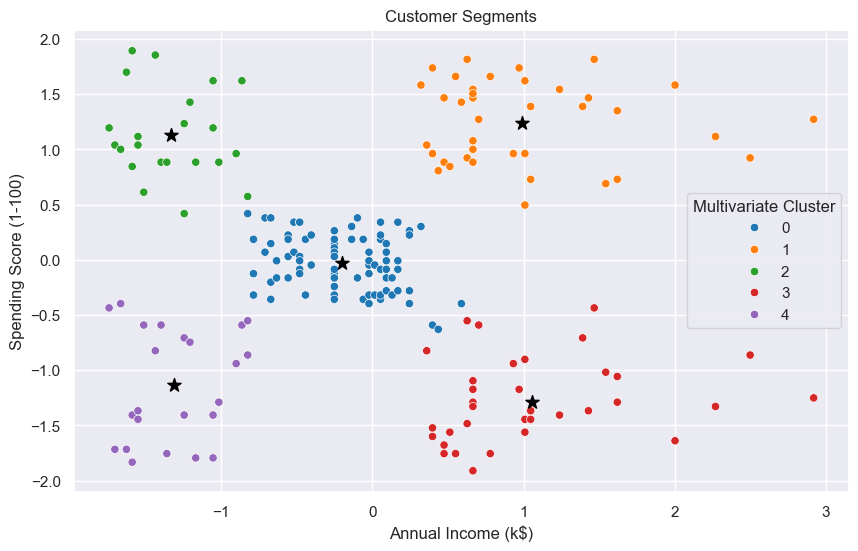

In [152]:
plt.figure(figsize=(10, 6))
#plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=df2['Multivariate Cluster'], cmap='viridis')
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Multivariate Cluster', palette='tab10')
plt.scatter(x=centroids2['x'], y=centroids2['y'], s=100, c='black', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
#plt.colorbar()
plt.show()